In [8]:
import numpy as np, random, operator, pandas as pd, matplotlib.pyplot as plt

In [9]:
class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def distance(self, city):
        xDis = abs(self.x - city.x)
        yDis = abs(self.y - city.y)
        distance = np.sqrt((xDis ** 2) + (yDis ** 2))
        return distance
    
    def __repr__(self):
        return "(" + str(self.x) + "," + str(self.y) + ")"

In [10]:
class Fitness:
    def __init__(self, route):
        self.route = route
        self.distance = 0
        self.fitness= 0.0
    
    def routeDistance(self):
        if self.distance ==0:
            pathDistance = 0
            for i in range(0, len(self.route)):
                fromCity = self.route[i]
                toCity = None
                if i + 1 < len(self.route):
                    toCity = self.route[i + 1]
                else:
                    toCity = self.route[0]
                pathDistance += fromCity.distance(toCity)
            self.distance = pathDistance
        return self.distance
    
    def routeFitness(self):
        if self.fitness == 0:
            self.fitness = 1 / float(self.routeDistance())
        return self.fitness

In [11]:
def createRoute(cityList):
    route = random.sample(cityList, len(cityList))
    return route

In [12]:
def initialPopulation(popSize, cityList):
    population = []

    for i in range(0, popSize):
        population.append(createRoute(cityList))
    return population

In [13]:
def rankRoutes(population):
    fitnessResults = {}
    for i in range(0,len(population)):
        fitnessResults[i] = Fitness(population[i]).routeFitness()
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)

In [14]:
def selection(popRanked, eliteSize):
    selectionResults = []
    df = pd.DataFrame(np.array(popRanked), columns=["Index","Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()
    
    for i in range(0, eliteSize):
        selectionResults.append(popRanked[i][0])
    for i in range(0, len(popRanked) - eliteSize):
        pick = 100*random.random()
        for i in range(0, len(popRanked)):
            if pick <= df.iat[i,3]:
                selectionResults.append(popRanked[i][0])
                break
    return selectionResults

In [15]:
def matingPool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
    return matingpool

In [16]:
def breed(parent1, parent2):
    child = []
    childP1 = []
    childP2 = []
    
    geneA = int(random.random() * len(parent1))
    geneB = int(random.random() * len(parent1))
    
    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(startGene, endGene):
        childP1.append(parent1[i])
        
    childP2 = [item for item in parent2 if item not in childP1]

    child = childP1 + childP2
    return child

In [17]:
def breedPopulation(matingpool, eliteSize):
    children = []
    length = len(matingpool) - eliteSize
    pool = random.sample(matingpool, len(matingpool))

    for i in range(0,eliteSize):
        children.append(matingpool[i])
    
    for i in range(0, length):
        child = breed(pool[i], pool[len(matingpool)-i-1])
        children.append(child)
    return children

In [18]:
def mutate(individual, mutationRate):
    for swapped in range(len(individual)):
        if(random.random() < mutationRate):
            swapWith = int(random.random() * len(individual))
            
            city1 = individual[swapped]
            city2 = individual[swapWith]
            
            individual[swapped] = city2
            individual[swapWith] = city1
    return individual

In [19]:
def mutatePopulation(population, mutationRate):
    mutatedPop = []
    
    for ind in range(0, len(population)):
        mutatedInd = mutate(population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    return mutatedPop

In [20]:
def nextGeneration(currentGen, eliteSize, mutationRate):
    popRanked = rankRoutes(currentGen)
    selectionResults = selection(popRanked, eliteSize)
    matingpool = matingPool(currentGen, selectionResults)
    children = breedPopulation(matingpool, eliteSize)
    nextGeneration = mutatePopulation(children, mutationRate)
    return nextGeneration

In [21]:
def geneticAlgorithm(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    print("Initial distance: " + str(1 / rankRoutes(pop)[0][1]))
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
    
    print("Final distance: " + str(1 / rankRoutes(pop)[0][1]))
    bestRouteIndex = rankRoutes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]
    return bestRoute

In [22]:
cityList = []

# for i in range(0,20):
#     cityList.append(City(x=int(random.random() * 200), y=int(random.random() * 200)))
    
coordinat = [
    (55.75371, 37.61988),
    (55.75252, 37.62308),
    (55.744525, 37.605281),
    (55.7262, 37.55639),
    (55.75116, 37.62872),
    (55.66766, 37.67069),
    (55.7942, 37.74907),
    (55.76013, 37.61864),
    (55.74138, 37.62086),
    (55.75533, 37.61784),
    (55.7473, 37.60511),
    (55.76323, 37.57659),
    (55.76144, 37.58365),
    (55.76015, 37.62469),
    (55.75489, 37.62158)
]

for i in range(0,15):
    cityList.append(City(x=(coordinat[i][0] * 111.134861111), y=(coordinat[i][1] * 71.2403572324)))

In [23]:
cityList

[(6196.180817272972,2680.0536902400204),
 (6196.048566788249,2680.281659383164),
 (6195.160043573668,2679.013652264784),
 (6193.123497243809,2675.530639959335),
 (6195.897423377139,2680.683454997955),
 (6186.61766247437,2683.6734127909986),
 (6200.680667799356,2689.257231990874),
 (6196.894303081304,2679.9653521970517),
 (6194.810524435474,2680.123505790108),
 (6196.360855747972,2679.908359911266),
 (6195.468442813251,2679.001470163698),
 (6197.238821150749,2676.96969517543),
 (6197.039889749361,2677.47265209749),
 (6196.896525778528,2680.396356358308),
 (6196.311956409084,2680.1747988473153)]

In [28]:
geneticAlgorithm(population=cityList, popSize=100, eliteSize=20, mutationRate=0.01, generations=50)

Initial distance: 57.13282194468688
Final distance: 47.08626789970432


[(6196.896525778528,2680.396356358308),
 (6196.894303081304,2679.9653521970517),
 (6196.360855747972,2679.908359911266),
 (6196.311956409084,2680.1747988473153),
 (6196.180817272972,2680.0536902400204),
 (6196.048566788249,2680.281659383164),
 (6195.897423377139,2680.683454997955),
 (6194.810524435474,2680.123505790108),
 (6195.160043573668,2679.013652264784),
 (6195.468442813251,2679.001470163698),
 (6197.039889749361,2677.47265209749),
 (6197.238821150749,2676.96969517543),
 (6193.123497243809,2675.530639959335),
 (6186.61766247437,2683.6734127909986),
 (6200.680667799356,2689.257231990874)]

In [29]:
def geneticAlgorithmPlot(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    progress = []
    progress.append(1 / rankRoutes(pop)[0][1])
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
        progress.append(1 / rankRoutes(pop)[0][1])
    
    plt.plot(progress)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.show()

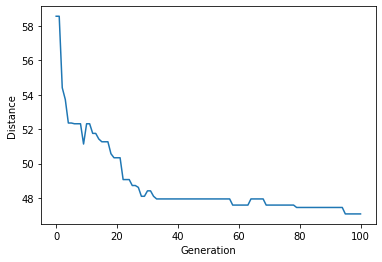

In [31]:
geneticAlgorithmPlot(population=cityList, popSize=100, eliteSize=20, mutationRate=0.01, generations=100)